# This script contains the following:
- Import libraries & load datasets
- Creation of a subset with less columns
- Vizualisation of Age groups
- Vizualisation of income groups
- Vizualisation of Family status
- Export 

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


# Load datasets

In [2]:
# Define full absolute paths
path = r'/Users/macbook/Dropbox/Mac/Documents/Pro/Data Analyst/Course_Career foundry/A4_Python/2023.08_Instacart basket analysis/02_data/'
file_path = os.path.join(path, 'prepared data', 'all_data_above_5_orders_V2')

# Import the dataframe
df = pd.read_pickle(file_path)

In [3]:
# Checking loading
df.head()

,order_id,user_id,number_order_client,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,fam_status,income,region,age_group,income_category,department,has_pets,family_type
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,2/17/2019,3,married,40423,South,30-39,Middle income,beverages,No,big family
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,South,30-39,Middle income,beverages,No,big family
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,South,30-39,Middle income,beverages,No,big family
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,South,30-39,Middle income,beverages,No,big family
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,South,30-39,Middle income,beverages,No,big family


In [4]:
# Check loading
df.columns


Index(['order_id', 'user_id', 'number_order_client', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'department_id',
       'prices', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'median_days', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'region',
       'age_group', 'income_category', 'department', 'has_pets',
       'family_type'],
      dtype='object')

# Creation of a subset 
reduce the number of column of the data frame for clarity

In [5]:
selected_columns = ['number_order_client', 
'orders_day_of_week', 'order_hour_of_day', 'product_name', 
'prices', 'busiest_period_of_day', 'loyalty_flag', 
'spending_flag', 'frequency_flag', 'gender', 'state',
'age_group', 'income','income_category', 'region', 'department', 'has_pets', 'fam_status', 'family_type']

df_sub = df[selected_columns]

# Checking subset of dataframe
df_sub.head()


,number_order_client,orders_day_of_week,order_hour_of_day,product_name,prices,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,gender,state,age_group,income,income_category,region,department,has_pets,fam_status,family_type
0,1,2,8,Soda,9.0,Average orders,new customer,Low spender,Non-frequent customer,Female,Alabama,30-39,40423,Middle income,South,beverages,No,married,big family
1,2,3,7,Soda,9.0,Average orders,new customer,Low spender,Non-frequent customer,Female,Alabama,30-39,40423,Middle income,South,beverages,No,married,big family
2,3,3,12,Soda,9.0,Most orders,new customer,Low spender,Non-frequent customer,Female,Alabama,30-39,40423,Middle income,South,beverages,No,married,big family
3,4,4,7,Soda,9.0,Average orders,new customer,Low spender,Non-frequent customer,Female,Alabama,30-39,40423,Middle income,South,beverages,No,married,big family
4,5,4,15,Soda,9.0,Most orders,new customer,Low spender,Non-frequent customer,Female,Alabama,30-39,40423,Middle income,South,beverages,No,married,big family


# Vizualisation for customer profiles

## Age groups

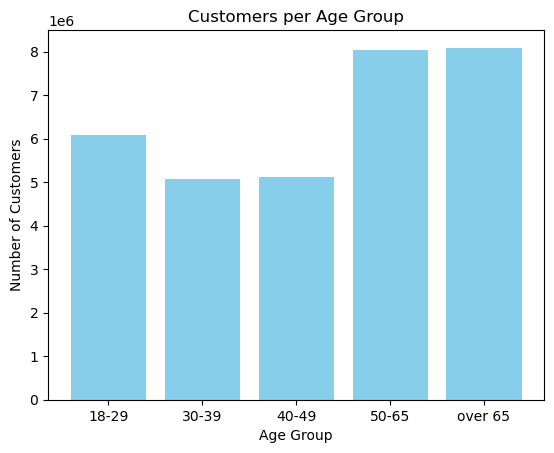

In [6]:
# Count the number of customers in each age group and sort them by index
age_group_counts = df['age_group'].value_counts().sort_index()

# Create a bar chart to visualize the distribution of customers across age groups
plt.bar(age_group_counts.index, age_group_counts.values, color='skyblue')
plt.title('Customers per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()



# Vizs income groups

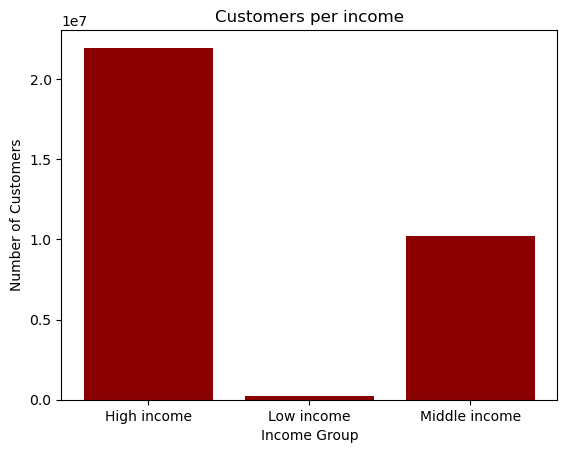

In [7]:
# Vizualisation income groups
income_group_counts = df['income_category'].value_counts().sort_index()

plt.bar(income_group_counts.index, income_group_counts.values, color='darkred')
plt.title('Customers per income')
plt.xlabel('Income Group')
plt.ylabel('Number of Customers')
plt.show()


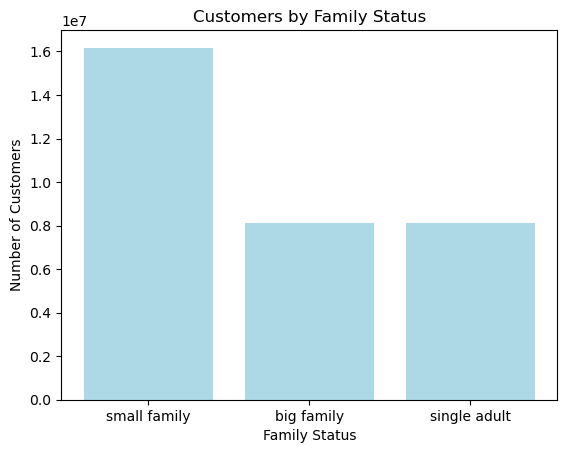

In [8]:
# Vizs Family status
family_status_counts = df['family_type'].value_counts()


plt.bar(family_status_counts.index, family_status_counts.values, color='lightblue')
plt.title('Customers by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Number of Customers')
plt.show()


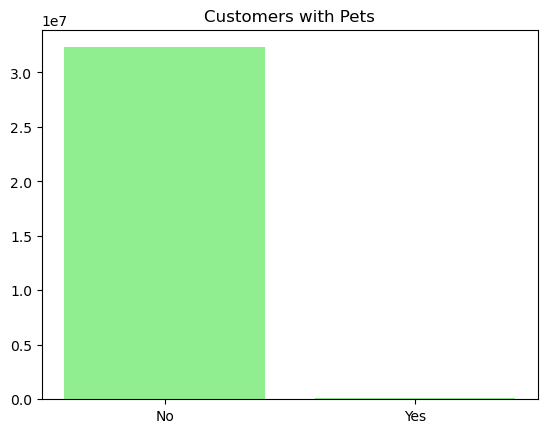

In [9]:
# Vizs for 'has pet'
has_pets_counts = df['has_pets'].value_counts()

plt.bar(has_pets_counts.index, has_pets_counts.values, color='lightgreen')
plt.title('Customers with Pets')
plt.show()


# Export 

In [10]:
# Export in pickel
df_sub.to_pickle(os.path.join(path,'prepared data','all_data_above_5_orders_V3'))